In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dictionary with the rankings of the cards
cardranks={
    "10": 1,
    "J": 2,
    "Q": 3,
    "K": 4,
    "A": 5}


In [3]:
#random sampling of cards
def samplecards():
    hand=np.random.choice(list(cardranks.keys()),5,replace=False)
    return hand

In [4]:
#finds numbers of wins, losses, ties depending on the hand
def oneround(player1,player2):
    win=0
    loss=0
    tie=0
    for i in range(5):
        val1=cardranks[player1[i]]
        val2=cardranks[player2[i]]
        if val1>val2:
            win=win+1
        elif val1<val2:
            loss=loss+1
        else: tie=tie+1
        results={
            "win": win,
            "loss": loss,
            "tie": tie}
    return results

In [5]:
#both players are randomly shuffling their cards
def randomgame():
    player1=samplecards()
    player2=samplecards()
    return oneround(player1,player2)

In [6]:
#set test order
ordered=['A','K','Q','J','10']

In [7]:
#scenario: one random shuffle and one ordered set
def testgame():
    player1=ordered
    player2=samplecards()
    return oneround(player1,player2)

In [8]:
#finds probability of winning in the double random scenario
def randomgamewins(trials):
    wins=0
    for i in range(trials):
        rounds=randomgame()
        if rounds["win"]<rounds["loss"]:
            wins=wins+1
    winprob=wins/trials
    return winprob

In [9]:
#finds probability of losing in the double random scenario
def randomgameloss(trials):
    losses=0
    for i in range(trials):
        rounds=randomgame()
        if rounds["win"]<rounds["loss"]:
            losses=losses+1
    lossprob=losses/trials
    return lossprob

In [10]:
#finds probability of tying in the double random scenario
def randomgameties(trials):
    ties=0
    for i in range(trials):
        rounds=randomgame()
        if rounds["win"]==rounds["loss"]:
            ties=ties+1
    tieprob=ties/trials
    return tieprob

In [12]:
#calculate probability of winning (demonstrate law of large numbers)
trials=np.arange(100,50100,500)
winprob=[]
for i in range(len(trials)):
    trial=trials[i]
    winprob.append(randomgamewins(trial))

In [ ]:
#calculate probability of losing (demonstrate law of large numbers)
loseprob=[]
for i in range(len(trials)):
    trial=trials[i]
    loseprob.append(randomgameloss(trial))

In [13]:
#calculate probability of tying (demonstrate law of large numbers)
tieprob=[]
for i in range(len(trials)):
    trial=trials[i]
    tieprob.append(randomgameties(trial))

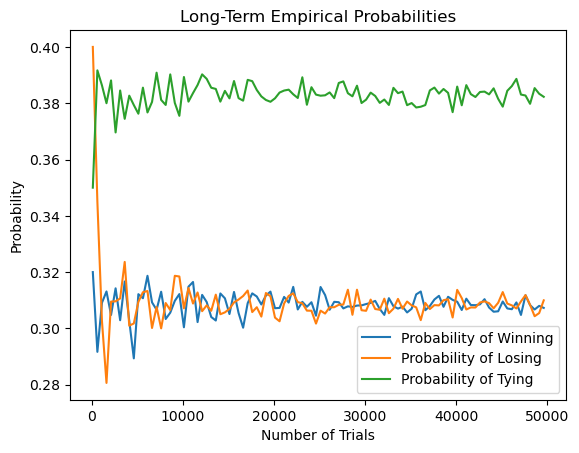

In [14]:
#plot showing lln for win, lose, and tie for double random scenario
plt.plot(trials,winprob, label="Probability of Winning")
plt.plot(trials,loseprob, label="Probability of Losing")
plt.plot(trials, tieprob, label= "Probability of Tying")
plt.title("Long-Term Empirical Probabilities")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.legend()

In [13]:
#finds probability of winning in the single random scenario
def testgamewins(trials):
    wins=0
    for i in range(trials):
        rounds=testgame()
        if rounds["win"]<rounds["loss"]:
            wins=wins+1
    winprob=wins/trials
    return winprob
#finds probability of losing in the single random scenario
def testgameloss(trials):
    losses=0
    for i in range(trials):
        rounds=testgame()
        if rounds["win"]<rounds["loss"]:
            losses=losses+1
    lossprob=losses/trials
    return lossprob
#finds probability of tying in the single random scenario
def testgameties(trials):
    ties=0
    for i in range(trials):
        rounds=testgame()
        if rounds["win"]==rounds["loss"]:
            ties=ties+1
    tieprob=ties/trials
    return tieprob

In [16]:
#calculate probability of winning (demonstrate law of large numbers)
trials=np.arange(100,50100,500)
testwinprob=[]
for i in range(len(trials)):
    trial=trials[i]
    testwinprob.append(testgamewins(trial))

In [17]:
#calculate probability of losing (demonstrate law of large numbers)
testloseprob=[]
for i in range(len(trials)):
    trial=trials[i]
    testloseprob.append(testgameloss(trial))

In [18]:
#calculate probability of tying (demonstrate law of large numbers)
testtieprob=[]
for i in range(len(trials)):
    trial=trials[i]
    testtieprob.append(testgameties(trial))

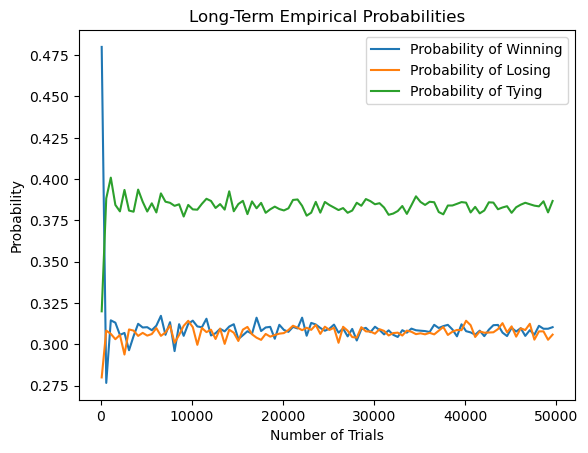

In [19]:
#plot showing lln for win, lose, and tie for single random scenario
plt.plot(trials,testwinprob, label="Probability of Winning")
plt.plot(trials,testloseprob, label="Probability of Losing")
plt.plot(trials, testtieprob, label= "Probability of Tying")
plt.title("Long-Term Empirical Probabilities")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.legend()

In [14]:
#Simulating the first unfair game with payouts
winnings=[]
avg_winnings = []
trials = []
n_sims = 100000

for i in range(n_sims):
    outcome = randomgame()
    if outcome["win"] < outcome["loss"]:
        winnings.append(-9)
    elif outcome["win"] > outcome["loss"]:
        winnings.append(8)
    else:
        winnings.append(0)
    trials.append(i + 1)
    avg_temp = sum(winnings)/(i+1)
    avg_winnings.append(avg_temp)

In [15]:
#Simulating the second unfair game with payouts
winnings2=[]
avg_winnings2 = []
n_sims = 100000

for i in range(n_sims):
    outcome = randomgame()
    if outcome["win"] < 4:
        winnings2.append(-5)
    else:
        winnings2.append(40)
    avg_temp = sum(winnings2)/(i+1)
    avg_winnings2.append(avg_temp)

In [16]:
import pandas as pd
unfair_games = pd.DataFrame({'trials': trials, 'game1': avg_winnings, 'game2': avg_winnings2})
true_exp1 = (37/120) * (-9) + (37/120) * 8
true_exp2 = (1/120) * (40) + (119/120) * -5

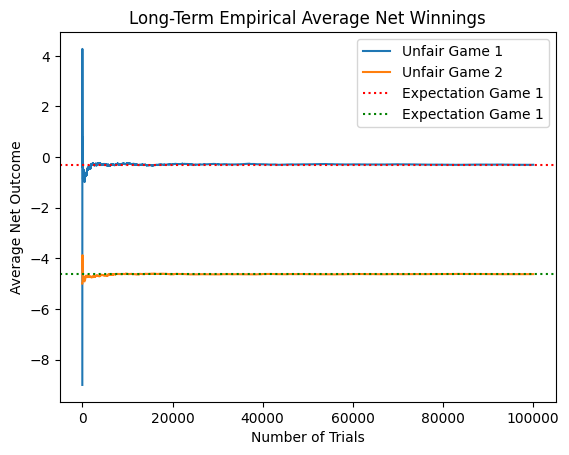

In [17]:
plt.plot(unfair_games['trials'], unfair_games['game1'], label="Unfair Game 1")
plt.plot(unfair_games['trials'], unfair_games['game2'], label="Unfair Game 2")
plt.axhline(y = true_exp1, color = 'r', linestyle = ':', label="Expectation Game 1") 
plt.axhline(y = true_exp2, color = 'g', linestyle = ':', label="Expectation Game 1") 
plt.title("Long-Term Empirical Average Net Winnings")
plt.xlabel("Number of Trials")
plt.ylabel("Average Net Outcome")
plt.legend()
plt.show()

In [20]:
#Simulating the game with payouts
total_wins = 0
total_losses = 0
total_ties = 0
n_sims = 100000

for i in range(n_sims):
    outcome = randomgame()
    if outcome["win"] > outcome["loss"]:
        total_wins += 1
    elif outcome["loss"] > outcome["win"]:
        total_losses += 1
    else:
        total_ties += 1

prob_win = total_wins / n_sims
prob_loss = total_losses / n_sims
prob_tie = total_ties / n_sims

In [21]:
#Defining payouts and calculating expectation
buy_in = 10
payoff_win = 8
payoff_loss = -9
payoff_tie = 0

expected_value = prob_win * payoff_win + prob_loss * payoff_loss + prob_tie * payoff_tie
expected_value

-0.3037900000000002

In [22]:
#Adding 4 of 5 flips rule
def outcome_casino(player1, player2):
    outcome = oneround(player1, player2)
    if outcome["win"] >= 4:
        return "win"
    else:
        return "loss"

In [23]:
#Simulating the adjusted game with payouts
total_wins = 0
total_losses = 0

for i in range(n_sims):
    outcome = outcome_casino(samplecards(), samplecards())
    if outcome == "win":
        total_wins += 1
    else:
        total_losses += 1

prob_win = total_wins / n_sims
prob_loss = total_losses / n_sims

In [24]:
#Defining new payouts and Calculating Expected Value
payoff_win = 40
payoff_loss = -5
expected_value_new = (prob_win * payoff_win) + (prob_loss * payoff_loss)
expected_value_new

-4.62155

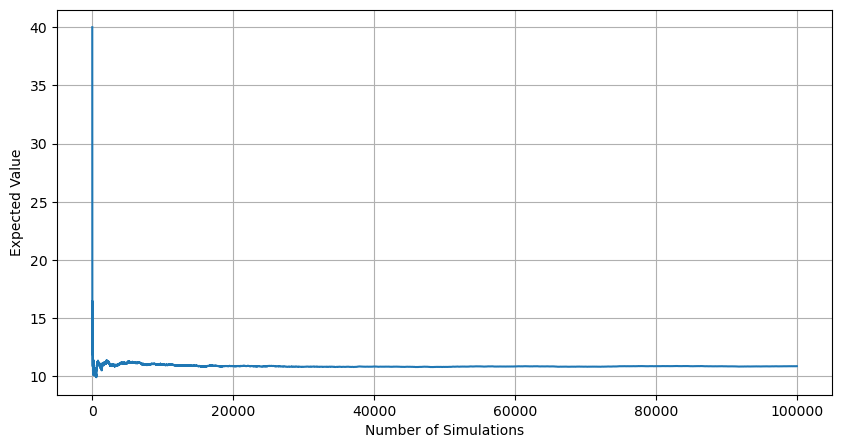

In [25]:
def simulate_games(n_sims):
    total_wins = 0
    total_losses = 0
    total_ties = 0
    outcomes = []

    for i in range(n_sims):
        outcome = randomgame()
        if outcome["win"] > outcome["loss"]:
            total_wins += 1
        elif outcome["loss"] > outcome["win"]:
            total_losses += 1
        else:
            total_ties += 1

        prob_win = total_wins / (i+1)
        prob_loss = total_losses / (i+1)
        prob_tie = total_ties / (i+1)

        expected_value = prob_win * payoff_win + prob_loss * payoff_loss + prob_tie * payoff_tie
        outcomes.append(expected_value)

    return outcomes

ev_convergence = simulate_games(n_sims)

# Plot the convergence of the expected value
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_sims + 1), ev_convergence, label='EV Convergence')
plt.xlabel('Number of Simulations')
plt.ylabel('Expected Value')
plt.grid(True)
plt.show()

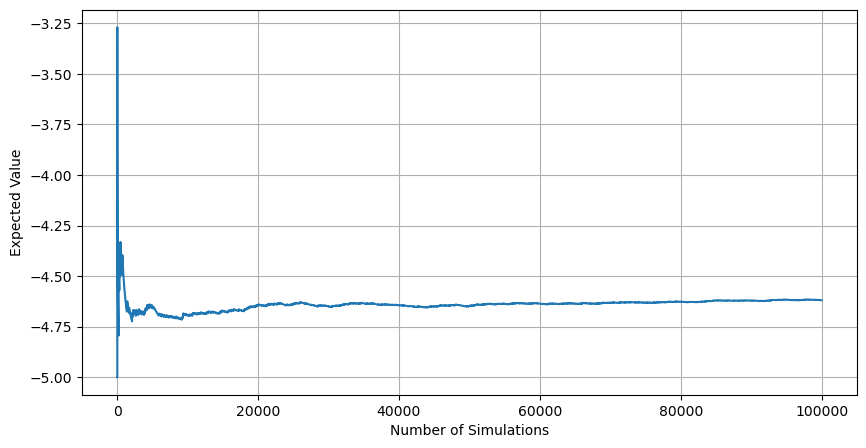

In [26]:
payoff_win = 40
payoff_loss = -5

def simulate_games(n_sims):
    total_wins = 0
    total_losses = 0
    total_ties = 0
    outcomes = []

    for i in range(n_sims):
        outcome = outcome_casino(samplecards(), samplecards())
        if outcome == "win":
            total_wins += 1
        elif outcome == "loss":
            total_losses += 1
        else:
            total_ties += 1

        prob_win = total_wins / (i+1)
        prob_loss = total_losses / (i+1)
        prob_tie = total_ties / (i+1)

        expected_value = (prob_win * payoff_win) + (prob_loss * payoff_loss)
        outcomes.append(expected_value)

    return outcomes

ev_convergence = simulate_games(n_sims)

# Plot the convergence of the expected value
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_sims + 1), ev_convergence, label='EV Convergence')
plt.xlabel('Number of Simulations')
plt.ylabel('Expected Value')
plt.grid(True)
plt.show()